In [1]:
import albumentations as A
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from PIL import Image
from utils import load_img_to_array, save_array_to_img

/raid/coss07/anaconda3/envs/IA/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [77]:
# Declare an augmentation pipeline
transform = A.Compose([
    A.RandomBrightnessContrast(always_apply=True, p=1.0, brightness_limit=(0.1,0.3), contrast_limit=(0.1,0.3), brightness_by_max=False),
])

In [78]:
def draw_bounding_boxes(image, bbox_data):
    for data in bbox_data:
        class_id, x_center, y_center, width, height = data
        x_center, y_center, width, height = [int(float(val) * image.shape[1]) if i % 2 == 0 else int(float(val) * image.shape[0]) for i, val in enumerate([x_center, y_center, width, height])]

        # 좌표 계산
        top_left = (x_center - width // 2, y_center - height // 2)
        bottom_right = (x_center + width // 2, y_center + height // 2)

        # 바운딩 박스 그리기
        cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)
        # 레이블 표시
        cv2.putText(image, str(class_id), (top_left[0], top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

In [79]:
def draw_three_images(image1, image2, image3, bbox_data):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 20))
    ax1.imshow(image1)
    ax1.axis('off')

    # 바운딩 박스와 레이블을 그린 이미지
    #draw_bounding_boxes(image2, bbox_data)
    ax2.imshow(image2)
    ax2.axis('off')

    draw_bounding_boxes(image3, bbox_data)
    ax3.imshow(image3)
    ax3.axis('off')
    plt.show()

In [80]:
def apply_transform_to_masked_area(image, mask, transform):
    # 마스크 영역에만 변형을 적용하기 위해 ROI를 추출합니다.
    roi = image.copy()
    roi[mask == 0] = 0  # 마스크가 0인 부분을 제거 (검은색으로 만듦)

    # 변형 적용
    transformed_img = transform(image=roi)['image']
    # 변형된 이미지를 원본 이미지에 다시 합치기
    image[mask != 0] = transformed_img[mask != 0]

    return image

In [81]:
img_folder_path =f'../wim_data/train/images/'
mask_folder_path =f'../wim_data/object_processing/'
txt_folder_path = f'../wim_data/train/labels/'

mask_file = '2023-04-24_41.mp4#t=126_mask.jpg'

In [82]:
splited = os.path.splitext(mask_file)
image_file = splited[0][:-5] + splited[1]

print(img_folder_path+image_file)
img2 = load_img_to_array(img_folder_path+image_file)
img = load_img_to_array(img_folder_path+image_file)
mask = load_img_to_array(mask_folder_path + mask_file)


txt_file = os.path.join(txt_folder_path, os.path.splitext(image_file)[0] + '.txt')

with open(txt_file, 'r') as file:
    lines = file.readlines()
    bbox_data = [line.strip().split() for line in lines]
        
transformed_img = apply_transform_to_masked_area(img2, mask, transform)

../wim_data/train/images/2023-04-24_41.mp4#t=126.jpg


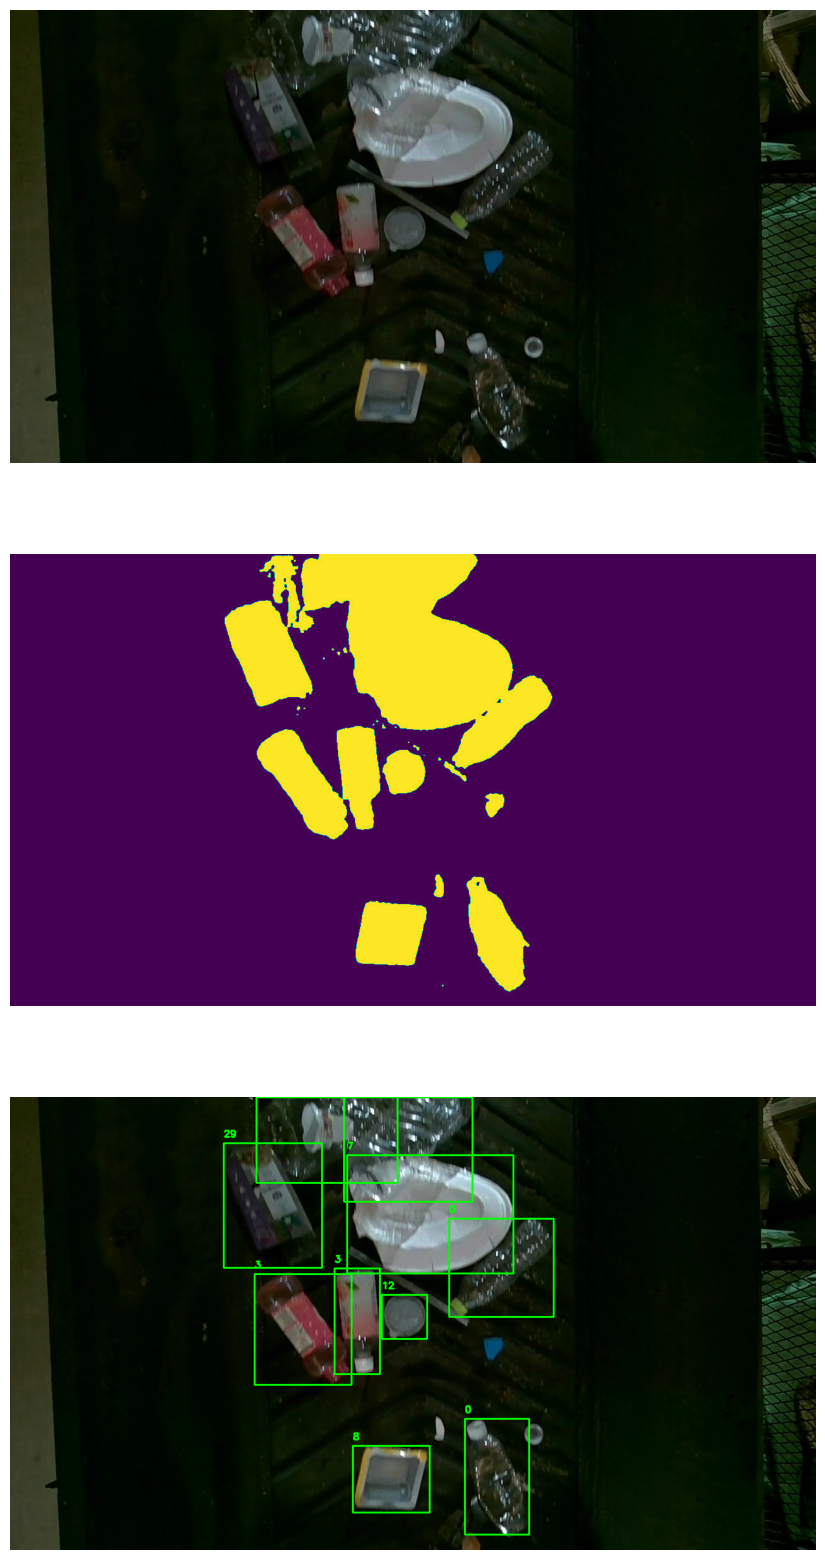

In [83]:
draw_three_images(img,mask, img2, bbox_data)

#### 자동화

In [84]:
mask_folder_path =f'../wim_data/object_processing/'
img_folder_path =f'../wim_data/train/images/'

In [74]:
mask_files = [f for f in os.listdir(mask_folder_path) if f.endswith('.jpg') or f.endswith('.png')]
print(len(mask_files))

800


In [ ]:
from tqdm import tqdm


In [75]:
processed_image_path = f'../wim_data/processed_images/brightness_50%/'

for mask_file in tqdm(mask_files):
    splited = os.path.splitext(mask_file)
    image_file = splited[0][:-5] + splited[1]
    img = load_img_to_array(img_folder_path+image_file)
    mask = load_img_to_array(mask_folder_path + mask_file)
    
    transformed_img = apply_transform_to_masked_area(img, mask, transform)
    
    save_array_to_img(transformed_img, processed_image_path + image_file)

In [76]:
processed_img = [f for f in os.listdir(processed_image_path) if f.endswith('.jpg') or f.endswith('.png')]
print(len(processed_img))

800
